In [2]:
import pandas as pd
import numpy as np

In [3]:
# importing check point 1 data 
# Setitng values in float insted of scientific notation
pd.options.display.float_format = '{:20,.4f}'.format

companies = pd.read_csv('companies.txt',sep='\t',encoding='iso-8859-1')
round2 = pd.read_csv('rounds2.csv',encoding='iso-8859-1')
#Check pont 1-4
#converting company_permalinks to upper and encoding
round2['company_permalink'] = round2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
round2['company_permalink'] = round2['company_permalink'].str.upper()
#converting companies permalink to upper
#companies.columns
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')
companies['permalink'] = companies['permalink'].str.upper()
#Rename companies column before merge
companies = companies.rename(columns={'permalink':'company_permalink'})
master_frame = pd.merge(companies, round2, on='company_permalink',how='left')

In [4]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [5]:
master_frame['raised_amount_usd'].describe()

count            94,959.0000
mean         10,426,869.3345
std         114,821,247.9849
min                   0.0000
25%             322,500.0000
50%           1,680,511.0000
75%           7,000,000.0000
max      21,271,935,000.0000
Name: raised_amount_usd, dtype: float64

In [6]:
# averages
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt               168,704,571.8224
post_ipo_equity              82,182,493.8710
secondary_market             79,649,630.1000
private_equity               73,308,593.0294
undisclosed                  19,242,370.2257
debt_financing               17,043,526.0230
venture                      11,748,949.1295
grant                         4,300,576.3395
convertible_note              1,453,438.5432
product_crowdfunding          1,363,131.0699
angel                           958,694.4698
seed                            719,817.9969
equity_crowdfunding             538,368.2109
non_equity_assistance           411,203.0548
Name: raised_amount_usd, dtype: float64

In [7]:
# medians
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)


funding_round_type
secondary_market             32,600,000.0000
private_equity               20,000,000.0000
post_ipo_debt                19,950,000.0000
post_ipo_equity              12,262,852.5000
venture                       5,000,000.0000
debt_financing                1,100,000.0000
undisclosed                   1,018,680.0000
angel                           400,000.0000
seed                            275,000.0000
convertible_note                272,000.0000
grant                           201,684.0000
product_crowdfunding            183,915.0000
equity_crowdfunding             100,000.0000
non_equity_assistance            60,000.0000
Name: raised_amount_usd, dtype: float64

In [8]:
import matplotlib.pyplot as plt
# the commonly used alias for seaborn is sns
import seaborn as sns
# set a seaborn style of your taste
sns.set_style("whitegrid")

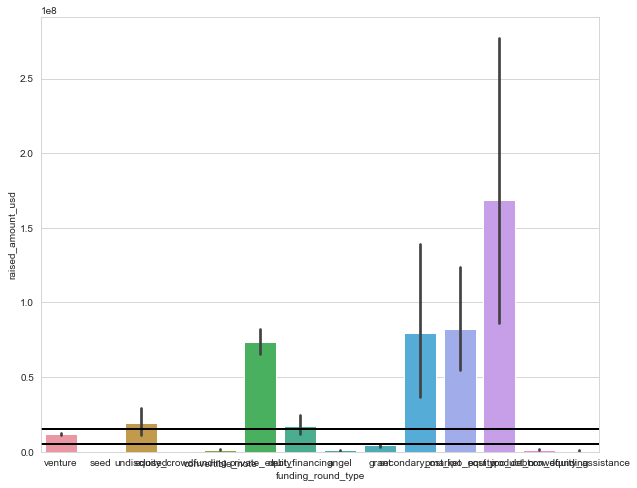

In [10]:
# bar plot with default statistic=mean
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

In [13]:
# master frame to only contain the 4 type of funding (['venture', 'angel', 'seed', 'private_equity']) rounds
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
# median of master frame
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)


funding_round_type
private_equity        20,000,000.0000
venture                5,000,000.0000
angel                    400,000.0000
seed                     275,000.0000
Name: raised_amount_usd, dtype: float64

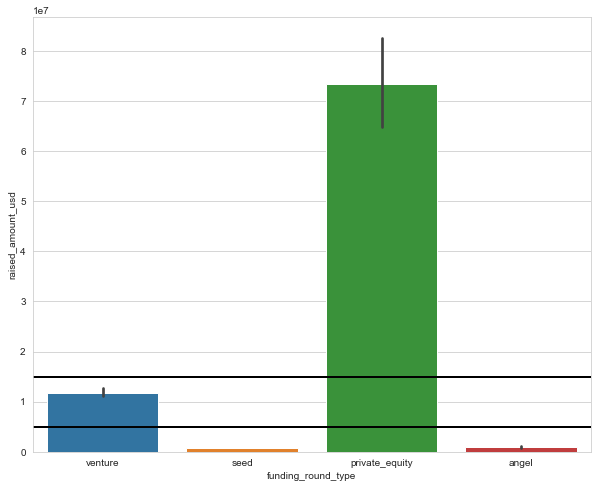

In [14]:
# bar plot with default statistic=mean
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

In [16]:
###################################     6.1 ###################################

#Checkpoint 6: Plots
    
#A plot showing the fraction of total investments (globally) 
#in venture, seed, and private equity, and the average amount of investment in each funding type. 
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.


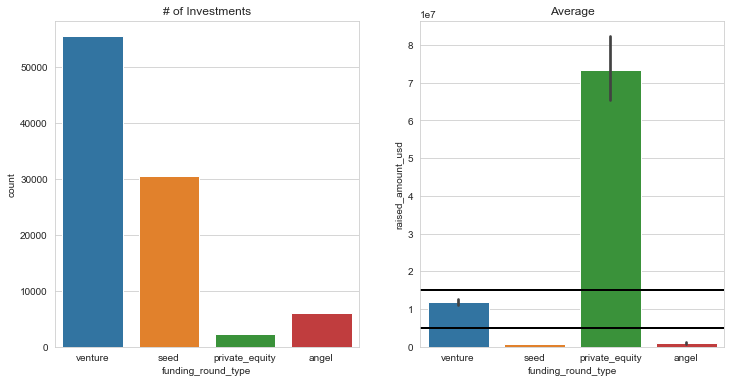

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

In [17]:
####################################################    End Check Point 2 #############################################